In [9]:

import numpy as np
import matplotlib.pyplot as plt

import cmath
import math

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## QUESTION 1

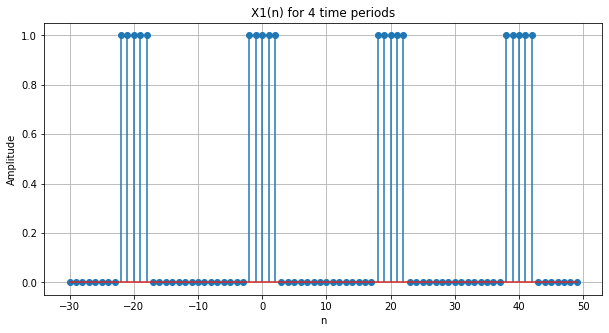

In [10]:
#plotting for 4 time periods
def x_1(n,m):
    x_1=[]
    for i in n:
        if(i>=-2+m and i<=2+m):
            x_1.append(1)
        else:
            x_1.append(0)
    return x_1
plt.figure(figsize=(10,5))
n=np.arange(-30,50,1)
X=[sum(i) for i in zip(x_1(n,0),x_1(n,-20),x_1(n,20),x_1(n,40))]
plt.stem(n,X)
plt.title('X1(n) for 4 time periods')
plt.xlabel('n' , size = 10 )
plt.ylabel("Amplitude", size= 10)
plt.grid()
plt.show()


In [12]:
n1=np.arange(-10,10,1)
x_n=np.array(x_1(n1,0))

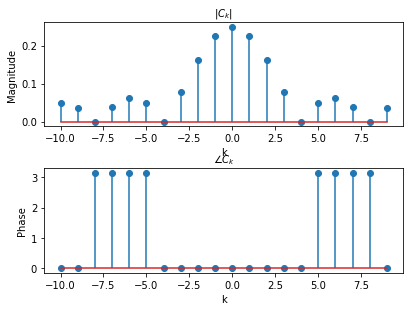

In [15]:
##DTFS

def c(k,n,x,N):
    c=np.exp(-1j*2*k*n*np.pi/N)
    return np.dot(x,c)/N

k=np.arange(-10,10,1)

plt.subplot(2,1,1)
mag=[np.abs(c(i,n1,x_n,20)) for i in k] #N=20
plt.xlabel('k' , size = 10 )
plt.ylabel("Magnitude", size= 10)
plt.title('$|C_k|$' , size = 10 )
plt.tight_layout()
plt.stem(k,mag)

plt.subplot(2,1,2)
phase=[np.angle(c(i,n1,x_n,20)) for i in k]
plt.xlabel('k' , size = 10 )
plt.ylabel("Phase", size= 10)
plt.title(r'$\angle C_k$', size = 10 )
plt.stem(k,phase)

plt.show()

    
dtfs=[c(i,n1,x_n,20) for i in k]    
    
    
    
    


## QUESTION 2

In [26]:
n2=np.arange(-10,10,1)

def reconstruct_x(dtfs,M,n2):
    x=np.zeros(20,dtype=np.complex)
    for i in range(20):
        for k in range(-M,M+1):
            x[i]+=dtfs[k+10]*cmath.exp(1j*k*2*np.pi*n2[i]/20)
    return x

    

<StemContainer object of 3 artists>

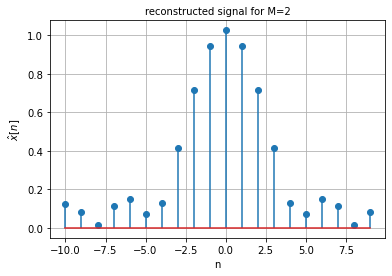

In [29]:
reconstruct_2=(np.abs(reconstruct_x(dtfs,2,n2)))
plt.xlabel('n' , size = 10 )
plt.ylabel('$\hat x[n]$', size= 10)
plt.title('reconstructed signal for M=2' , size = 10)
plt.grid()
plt.stem(n2,reconstruct_2)
    

    


<StemContainer object of 3 artists>

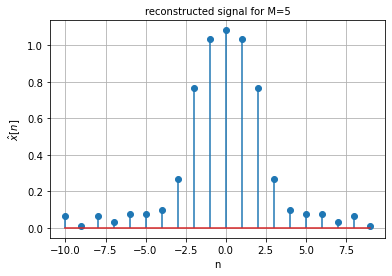

In [30]:
reconstruct_5=np.abs(recon_x(dtfs,5,n2))
plt.xlabel('n' , size = 10 )
plt.ylabel('$\hat x[n]$', size= 10)
plt.title('reconstructed signal for M=5' , size = 10 )
plt.grid()
plt.stem(n2,reconstruct_5)

### Observation:

#in second part(M=5) we are adding more number of fourier series coefficients than in the first part(M=2). #and we can observe that signal is getting more closer to original signal in second part than in the first part

## QUESTION 3

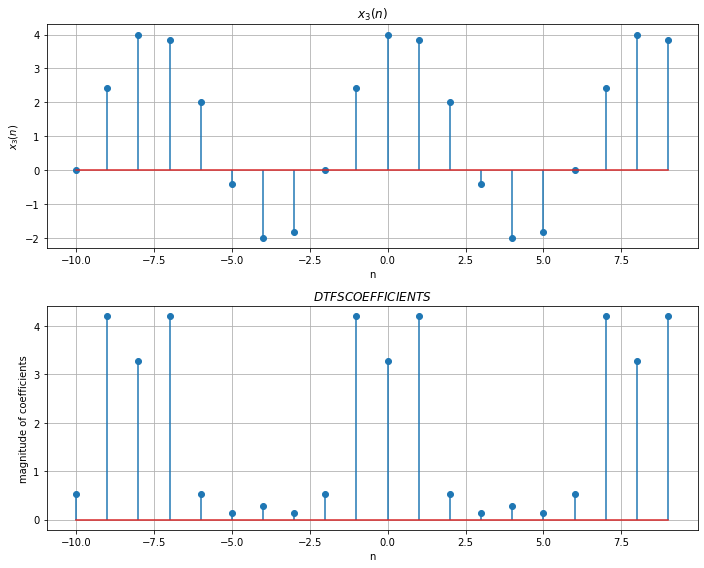

In [38]:
##plotting x(n)
def x_3(n):
    x_3=[]
    for i in n:
        x_3.append(1+np.sin(2*np.pi*(i%8)/(8))+3*np.cos(2*np.pi*(i%8)/(8)))
    return x_3


n3=np.arange(-10,10,1)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.title('$ x_3(n)$')
plt.xlabel('n' , size = 10 )
plt.ylabel('$x_3(n)$' , size = 10 )
plt.grid()
plt.tight_layout()
plt.stem(n3,x_3(n3))

plt.subplot(2,1,2)
magnitude=[np.abs(c(i,n3,x_3(n3),8)) for i in n3]
plt.title('$DTFS-COEFFICIENTS$')
plt.xlabel('n' , size = 10)
plt.ylabel('magnitude of coefficients' , size = 10 )
plt.grid()
plt.tight_layout()
plt.stem(n3,magnitude)

plt.grid
plt.show()

In [47]:
##checking parsevals theorem
N=8
n3_1=np.arange(-N/2,N/2,1)

#average power formula fro a signal
avg_power=sum(abs(np.array(x_3(n3_1)))**2)/N 

In [49]:
#summation of coefficients

magn=[np.abs(c(i,n3_1,x_3(n3_1),8)) for i in n3_1] 
sum_coeff=sum(pow(np.array(magn),2))

print(f"Power in n domain:{avg_power}")
print(f"Power in k domain:{sum_coeff}")

if(np.round(avg_power)==np.round(sum_coeff)):
    print("Parseval's theorem satisfies")
else:
    print("Parseval's theorem not satisfies")

Power in n domain:5.999999999999999
Power in k domain:6.0
Parseval's theorem satisfies


## QUESTION 4

<StemContainer object of 3 artists>

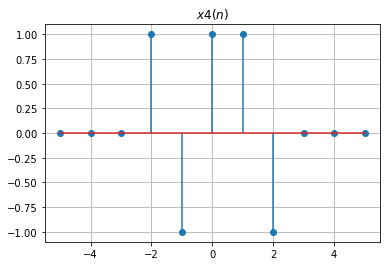

In [53]:
# given function
n=np.arange(-5,6,1)
x_4=[0,0,0,1,-1,1,1,-1,0,0,0]
w=np.linspace(-np.pi,np.pi,1000)
plt.title('$x4(n)$')
plt.grid()

plt.stem(n,x_4)

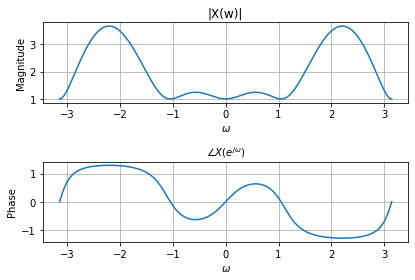

In [57]:
x_4=np.array(x_4)
#defining the real part
def x_real(x,w):
    d=np.dot(x,np.cos(n*w))
    return d

def x_imag(x,w):
    d=np.dot(x,np.sin(n*w))
    return d


X_real=[x_real(x_4,j) for j in w]
X_imag=[x_imag(x_4,j) for j in w]

#magnitude is sum of squares of real and imaginary parts
x_mag=[np.sqrt(a**2+b**2) for a,b in zip(X_real,X_imag)]

plt.subplot(2,1,1)
plt.plot(w,x_mag)
plt.title(r'$\|X(e^{j\omega})|$' , size= 10)
plt.xlabel('$\omega$' , size = 10)
plt.ylabel('Magnitude', size = 10 )
plt.grid()
plt.tight_layout()
plt.title('|X(w)|')

plt.subplot(2,1,2)
plt.title(r'$\angle X(e^{j\omega})$' , size= 10)
plt.xlabel('$\omega$' , size = 10 )
plt.ylabel('Phase', size = 10 )
plt.tight_layout()
plt.grid()
x_phase=[np.arctan2(-b,a) for a,b in zip(X_real,X_imag)]
plt.plot(w,x_phase)

plt.show()

## QUESTION 5

<StemContainer object of 3 artists>

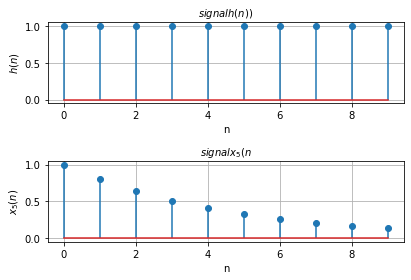

In [60]:
#impulse function
def h(n):
    h=[]
    for i in n:
        if(i>=0):
            h.append(1)
        else:
            h.append(0)
    return np.array(h)

#given function
def x_5(n):
    x_5=[]
    for i in n:
        if(i>=0):
            x_5.append(0.8**i)
        else:
            x_5.append(0)
    return np.array(x_5)


n=np.arange(0,10,1)

plt.subplot(2,1,1)
plt.title('$signal h(n))$' , size= 10)
plt.ylabel('$h(n)$' , size = 10 )
plt.xlabel('n', size = 10 )
plt.grid()
plt.tight_layout()
plt.stem(n,h(n))

plt.subplot(2,1,2)
plt.title('$signal x_5(n$' , size= 10)
plt.ylabel('$x_5(n)$' , size = 10 )
plt.xlabel('n', size = 10 )
plt.tight_layout()
plt.grid()
plt.stem(n,x_5(n))

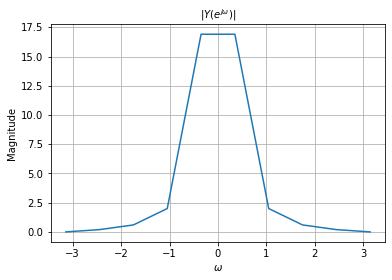

In [65]:
w=np.linspace(-np.pi,np.pi,10)

#DTFT FORMULA
def Dtft(x,w,n):
    d=[]
    for i in w:
        X_w=np.dot(x,np.exp(-1j*i*n))
        d.append(X_w)
    return d

X_w=Dtft(x_5(n),w,n)
H_w=Dtft(h(n),w,n)

Y_w=[a*b for a,b in zip(X_w,H_w)] #in this domain,output response is product of impulse response and given signal

plt.plot(w, np.abs(Y_w))
plt.title(r'$\|Y(e^{j\omega})|$' , size= 10)
plt.ylabel("Magnitude", size= 10)
plt.xlabel('$\omega$' , size = 10 )
plt.grid()
plt.show()

## PART 2

In [62]:
#CONVOLUTION
def convolution(inputseq,impulseresponse):
        lengthA=np.size(inputseq)
        lengthB=np.size(impulseresponse)
        C = np.zeros(lengthA + lengthB -1)
        for m in np.arange(lengthA):
            for n in np.arange(lengthB):
                C[m+n] = C[m+n] + inputseq[m]*impulseresponse[n]
        return C 


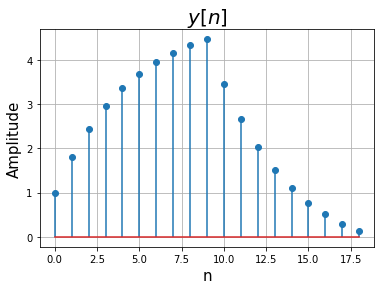

In [68]:
y_n=convolution(x_5(n),h(n))
y_n

plt.stem(np.arange(0,19),y_n)
plt.grid()
plt.xlabel('n' , size = 15 )
plt.ylabel("Amplitude", size= 15)
plt.title('$y[n]$' , size = 20 )
plt.show()

## QUESTION 6

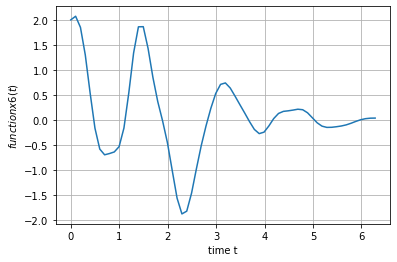

In [75]:
def x_6(t):
    x=np.exp(-(t**2)/10)*(np.sin(2*t)+2*np.cos(4*t)+0.4*np.sin(t)*np.sin(10*t))
    return x
t=np.linspace(0,2*np.pi,64)
plt.xlabel('time t')
plt.ylabel('$ function x6(t) $ ')
plt.grid()
plt.plot(t,x_6(t))

f=np.reshape(x_6(t),(64,1))

In [71]:
dimensions = (64,64)
W=np.ones(dimensions,dtype = 'complex_') #  64*64 ones matrix
print(W)

[[1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 ...
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]]


In [73]:
w=np.exp(-1j*(np.pi)/32)

for i in range(64):
    for j in range(64):
         W[i][j]=(w**(i*j))
           
        
W.reshape(64,64)

array([[1.        +0.j        , 1.        +0.j        ,
        1.        +0.j        , ..., 1.        +0.j        ,
        1.        +0.j        , 1.        +0.j        ],
       [1.        +0.j        , 0.99518473-0.09801714j,
        0.98078528-0.19509032j, ..., 0.95694034+0.29028468j,
        0.98078528+0.19509032j, 0.99518473+0.09801714j],
       [1.        +0.j        , 0.98078528-0.19509032j,
        0.92387953-0.38268343j, ..., 0.83146961+0.55557023j,
        0.92387953+0.38268343j, 0.98078528+0.19509032j],
       ...,
       [1.        +0.j        , 0.95694034+0.29028468j,
        0.83146961+0.55557023j, ..., 0.63439328-0.77301045j,
        0.83146961-0.55557023j, 0.95694034-0.29028468j],
       [1.        +0.j        , 0.98078528+0.19509032j,
        0.92387953+0.38268343j, ..., 0.83146961-0.55557023j,
        0.92387953-0.38268343j, 0.98078528-0.19509032j],
       [1.        +0.j        , 0.99518473+0.09801714j,
        0.98078528+0.19509032j, ..., 0.95694034-0.29028468j,
 

In [76]:
Y = np. dot(W,f)
print(Y)

[[ 6.22310297+0.00000000e+00j]
 [ 8.94162256+3.43376361e-01j]
 [ 2.98565909-1.04171926e+01j]
 [-3.00230298+9.36077315e+00j]
 [26.79003116+1.95133422e+00j]
 [ 3.20174999-1.48824746e+01j]
 [ 0.25105247-6.34919745e+00j]
 [ 0.4653612 -4.06383751e+00j]
 [ 0.71097472-2.51017238e+00j]
 [ 3.34379795-2.48940425e+00j]
 [ 1.09983244-4.82848003e+00j]
 [-1.83429336-3.33893736e+00j]
 [ 0.27326795-5.09499874e-01j]
 [ 0.83549075-1.16046509e+00j]
 [ 0.8535659 -1.17376033e+00j]
 [ 0.86738489-1.09797764e+00j]
 [ 0.87869678-1.00772584e+00j]
 [ 0.88802401-9.18081585e-01j]
 [ 0.89576425-8.32930639e-01j]
 [ 0.90222463-7.53057061e-01j]
 [ 0.90764211-6.78262709e-01j]
 [ 0.91220001-6.08043607e-01j]
 [ 0.91604091-5.41827934e-01j]
 [ 0.91927633-4.79061520e-01j]
 [ 0.92199396-4.19235832e-01j]
 [ 0.92426293-3.61893445e-01j]
 [ 0.92613779-3.06624795e-01j]
 [ 0.9276614 -2.53061874e-01j]
 [ 0.92886713-2.00871198e-01j]
 [ 0.92978044-1.49746964e-01j]
 [ 0.93042008-9.94046837e-02j]
 [ 0.93079887-4.95753452e-02j]
 [ 0.930

## QUESTION 7

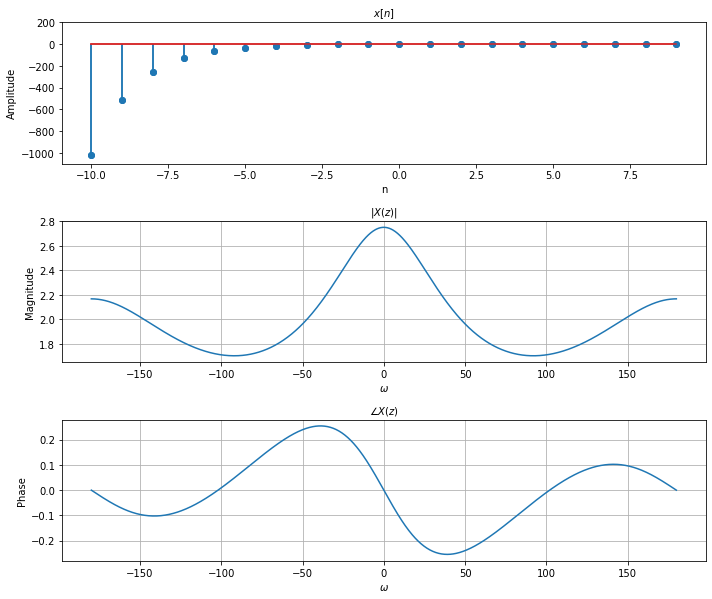

In [84]:
def x_7(n):
    x_7=[]
    for i in n:
        if(i>=0):
            x_7.append(np.power(-0.33,i))
        else:
            x_7.append((-np.power(0.5,i)))
    return x_7

w=np.linspace(-np.pi,np.pi,1000)
w1=np.linspace(math.degrees(-np.pi),math.degrees(np.pi),1000)


plt.figure(figsize=(10,8))
n=np.arange(-10,10,1)


plt.subplot(3,1,1)
plt.stem(n , x_7(n))
plt.xlabel('n' , size = 10 )
plt.ylabel('Amplitude' , size = 10 )
plt.title('$x[n]$' , size = 10 )
plt.grid()
plt.stem(n,x_7(n))   
plt.ylim(-1100,200)
plt.tight_layout()
plt.grid()

#x7(w) by solving
def x_7(w):
    return (12-(np.exp(-1j*w)))/(6-(np.exp(-1j*w))-(np.exp(-2j*w)))


plt.subplot(3,1,2)
plt.plot(w1,abs(x_7(w)))
plt.title(r'$\|X(z)|$' , size= 10)
plt.xlabel('$\omega$' , size = 10 )
plt.ylabel('Magnitude', size = 10 )
plt.tight_layout()
plt.grid()

plt.subplot(3,1,3)
phase=[cmath.phase(k) for k in x_7(w)]
plt.title(r'$\angle X(z)$' , size= 10)
plt.xlabel('$\omega$' , size = 10)
plt.ylabel('Phase', size = 10 )
plt.plot(w1,phase)
plt.grid()


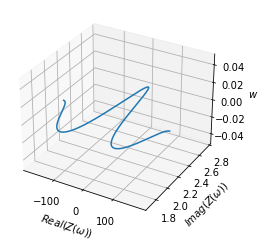

In [87]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlabel(r'$Real(Z(\omega))$', weight = 'bold')
ax.set_ylabel(r'$Imag(Z(\omega))$', weight = 'bold')
ax.set_zlabel(r'$w$')
ax.plot3D(w1, x_7(w).real)



<Figure size 720x576 with 0 Axes>

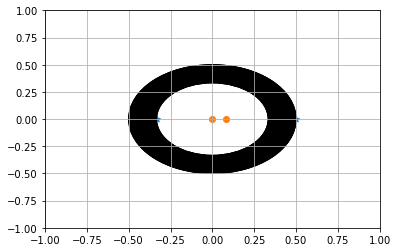

In [88]:
p=[-1/3,1/2] #poles
z=[0,1/12] #zeroes
y=[0,0]

plt.figure(figsize=(10,8))
figur,ax=plt.subplots()

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.scatter(p,y,marker='*')
plt.scatter(z,y,marker='o')


#initalising 2 circles of radius (1/3) and (1/2)
c1=plt.Circle((0,0),radius=1/3,fill=False)
c2=plt.Circle((0,0),radius=1/2,fill=False)

ax.add_patch(c1)
ax.add_patch(c2)

for i in np.linspace(1/3,1/2,100): 
    c=plt.Circle((0,0),radius=i,fill=False)
    ax.add_patch(c)

plt.grid()
plt.show()

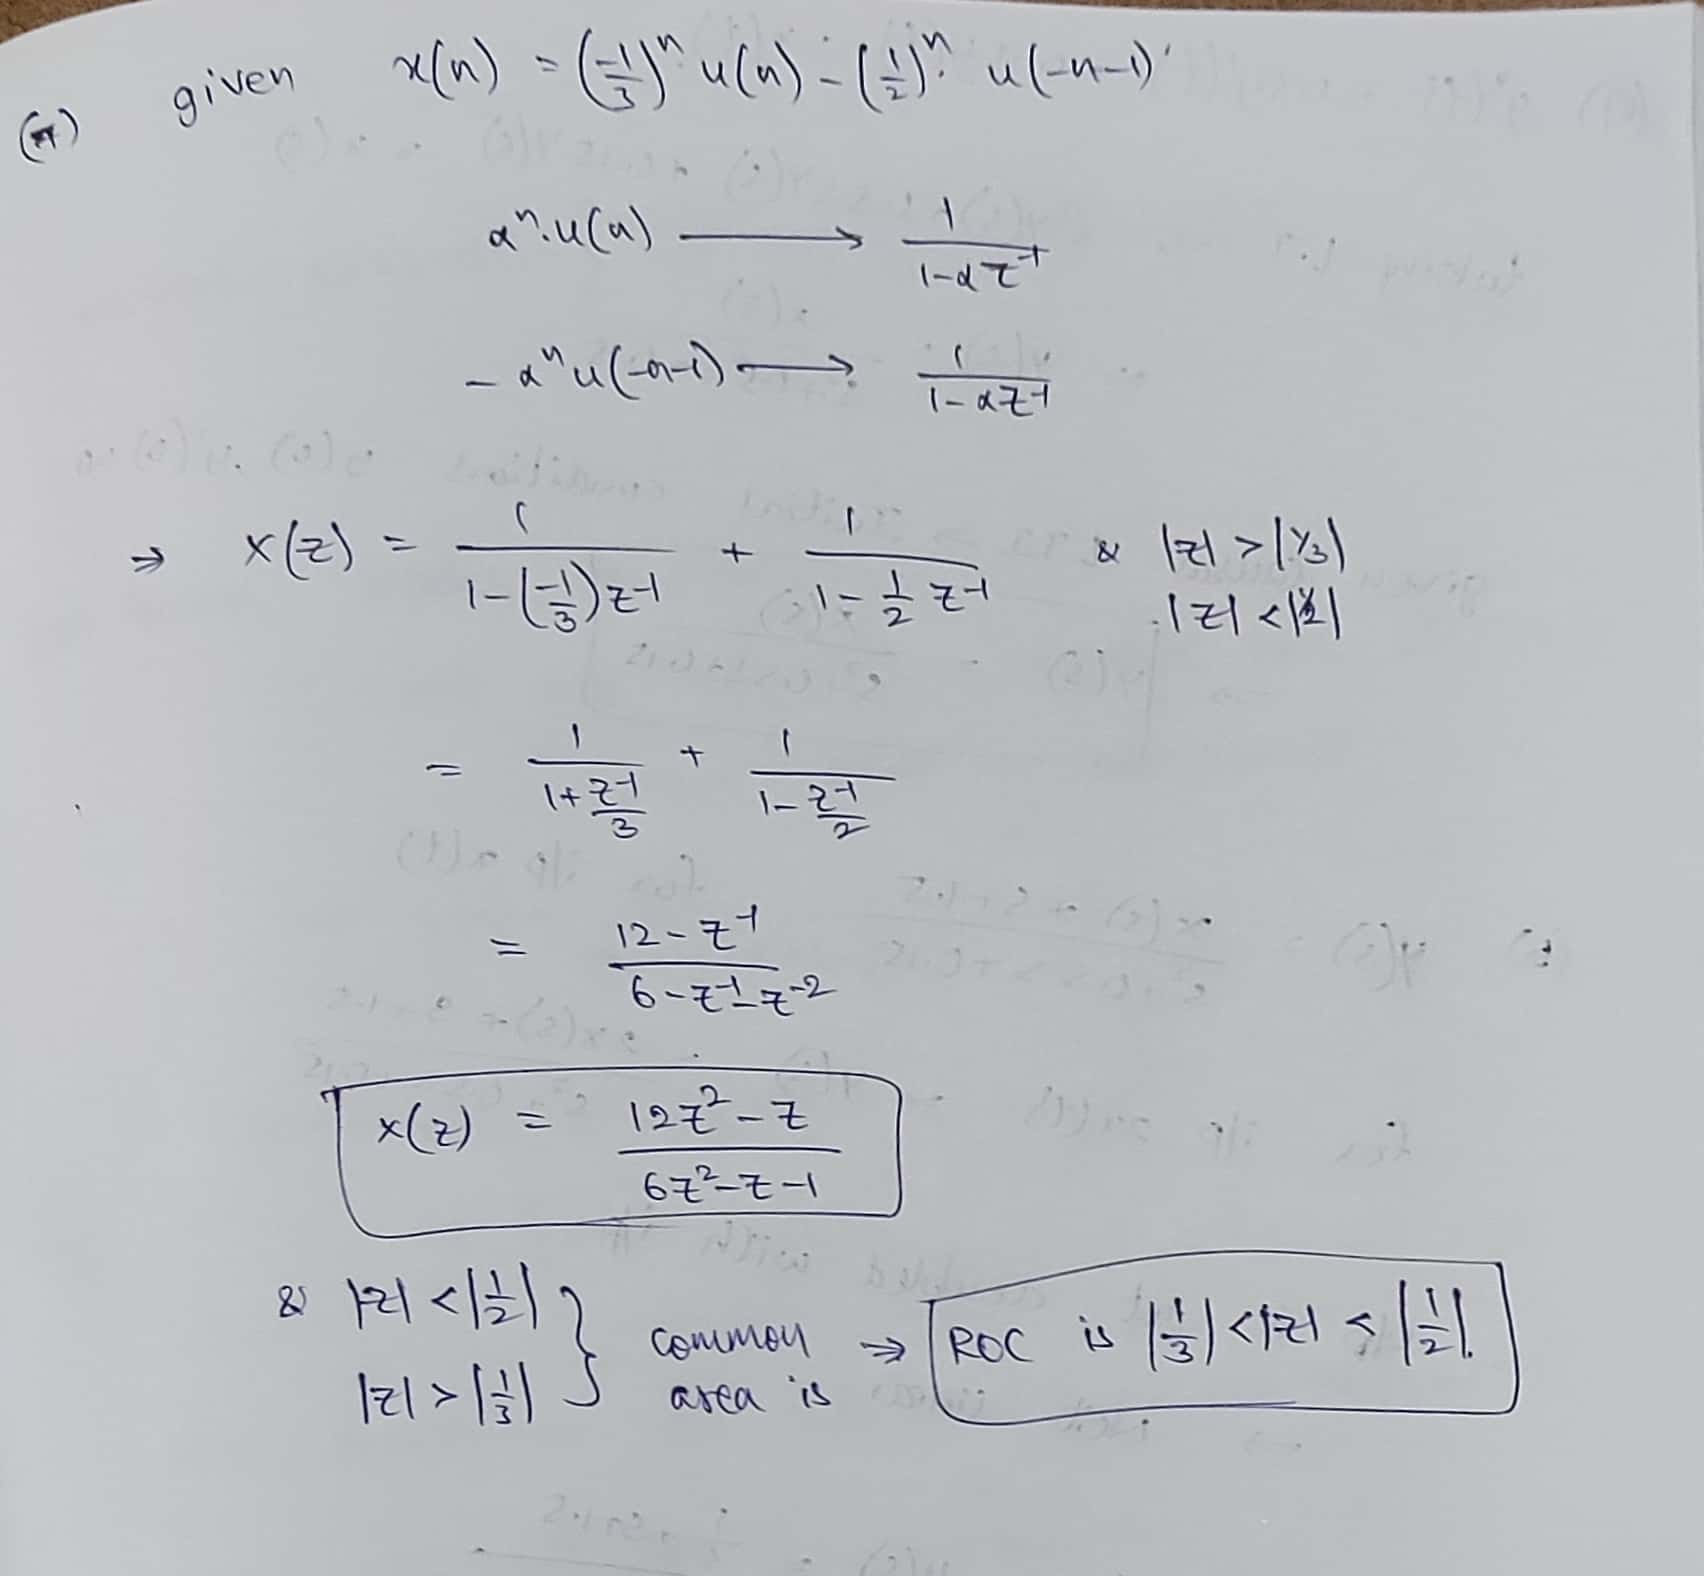

In [95]:
from IPython.display import Image
Image(filename='Q7.jpeg',width=400, height=200)

## QUESTION 8

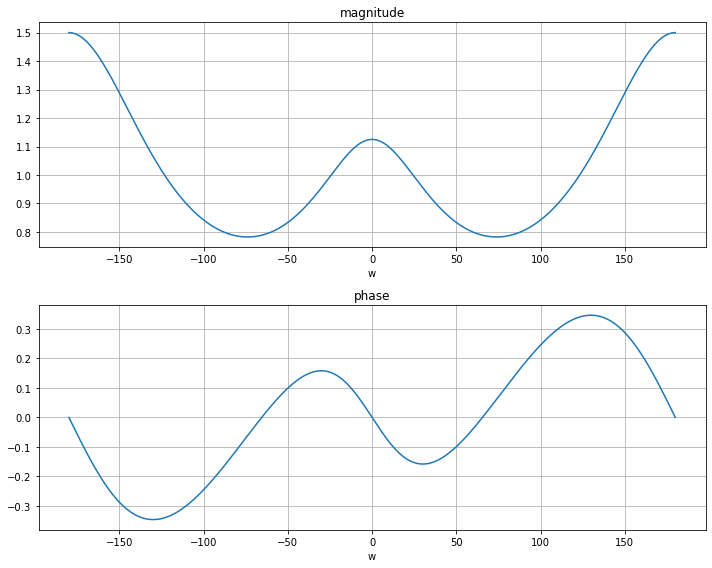

In [90]:
def x_8(w):
    return 18*np.exp(1j*3*w)/(18*np.exp(1j*3*w)+3*np.exp(1j*2*w)-4*np.exp(1j*w)-1)

w=np.linspace(-np.pi,np.pi,1000)
w1=np.linspace(math.degrees(-np.pi),math.degrees(np.pi),1000)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(w1,abs(x_8(w)))
plt.title('magnitude')
plt.xlabel('w')
plt.tight_layout()
plt.grid()

plt.subplot(2,1,2)
phase=[cmath.phase(k) for k in x_8(w)]
plt.plot(w1,phase)
plt.title('phase')
plt.xlabel('w')
plt.grid()
plt.tight_layout()
plt.show()

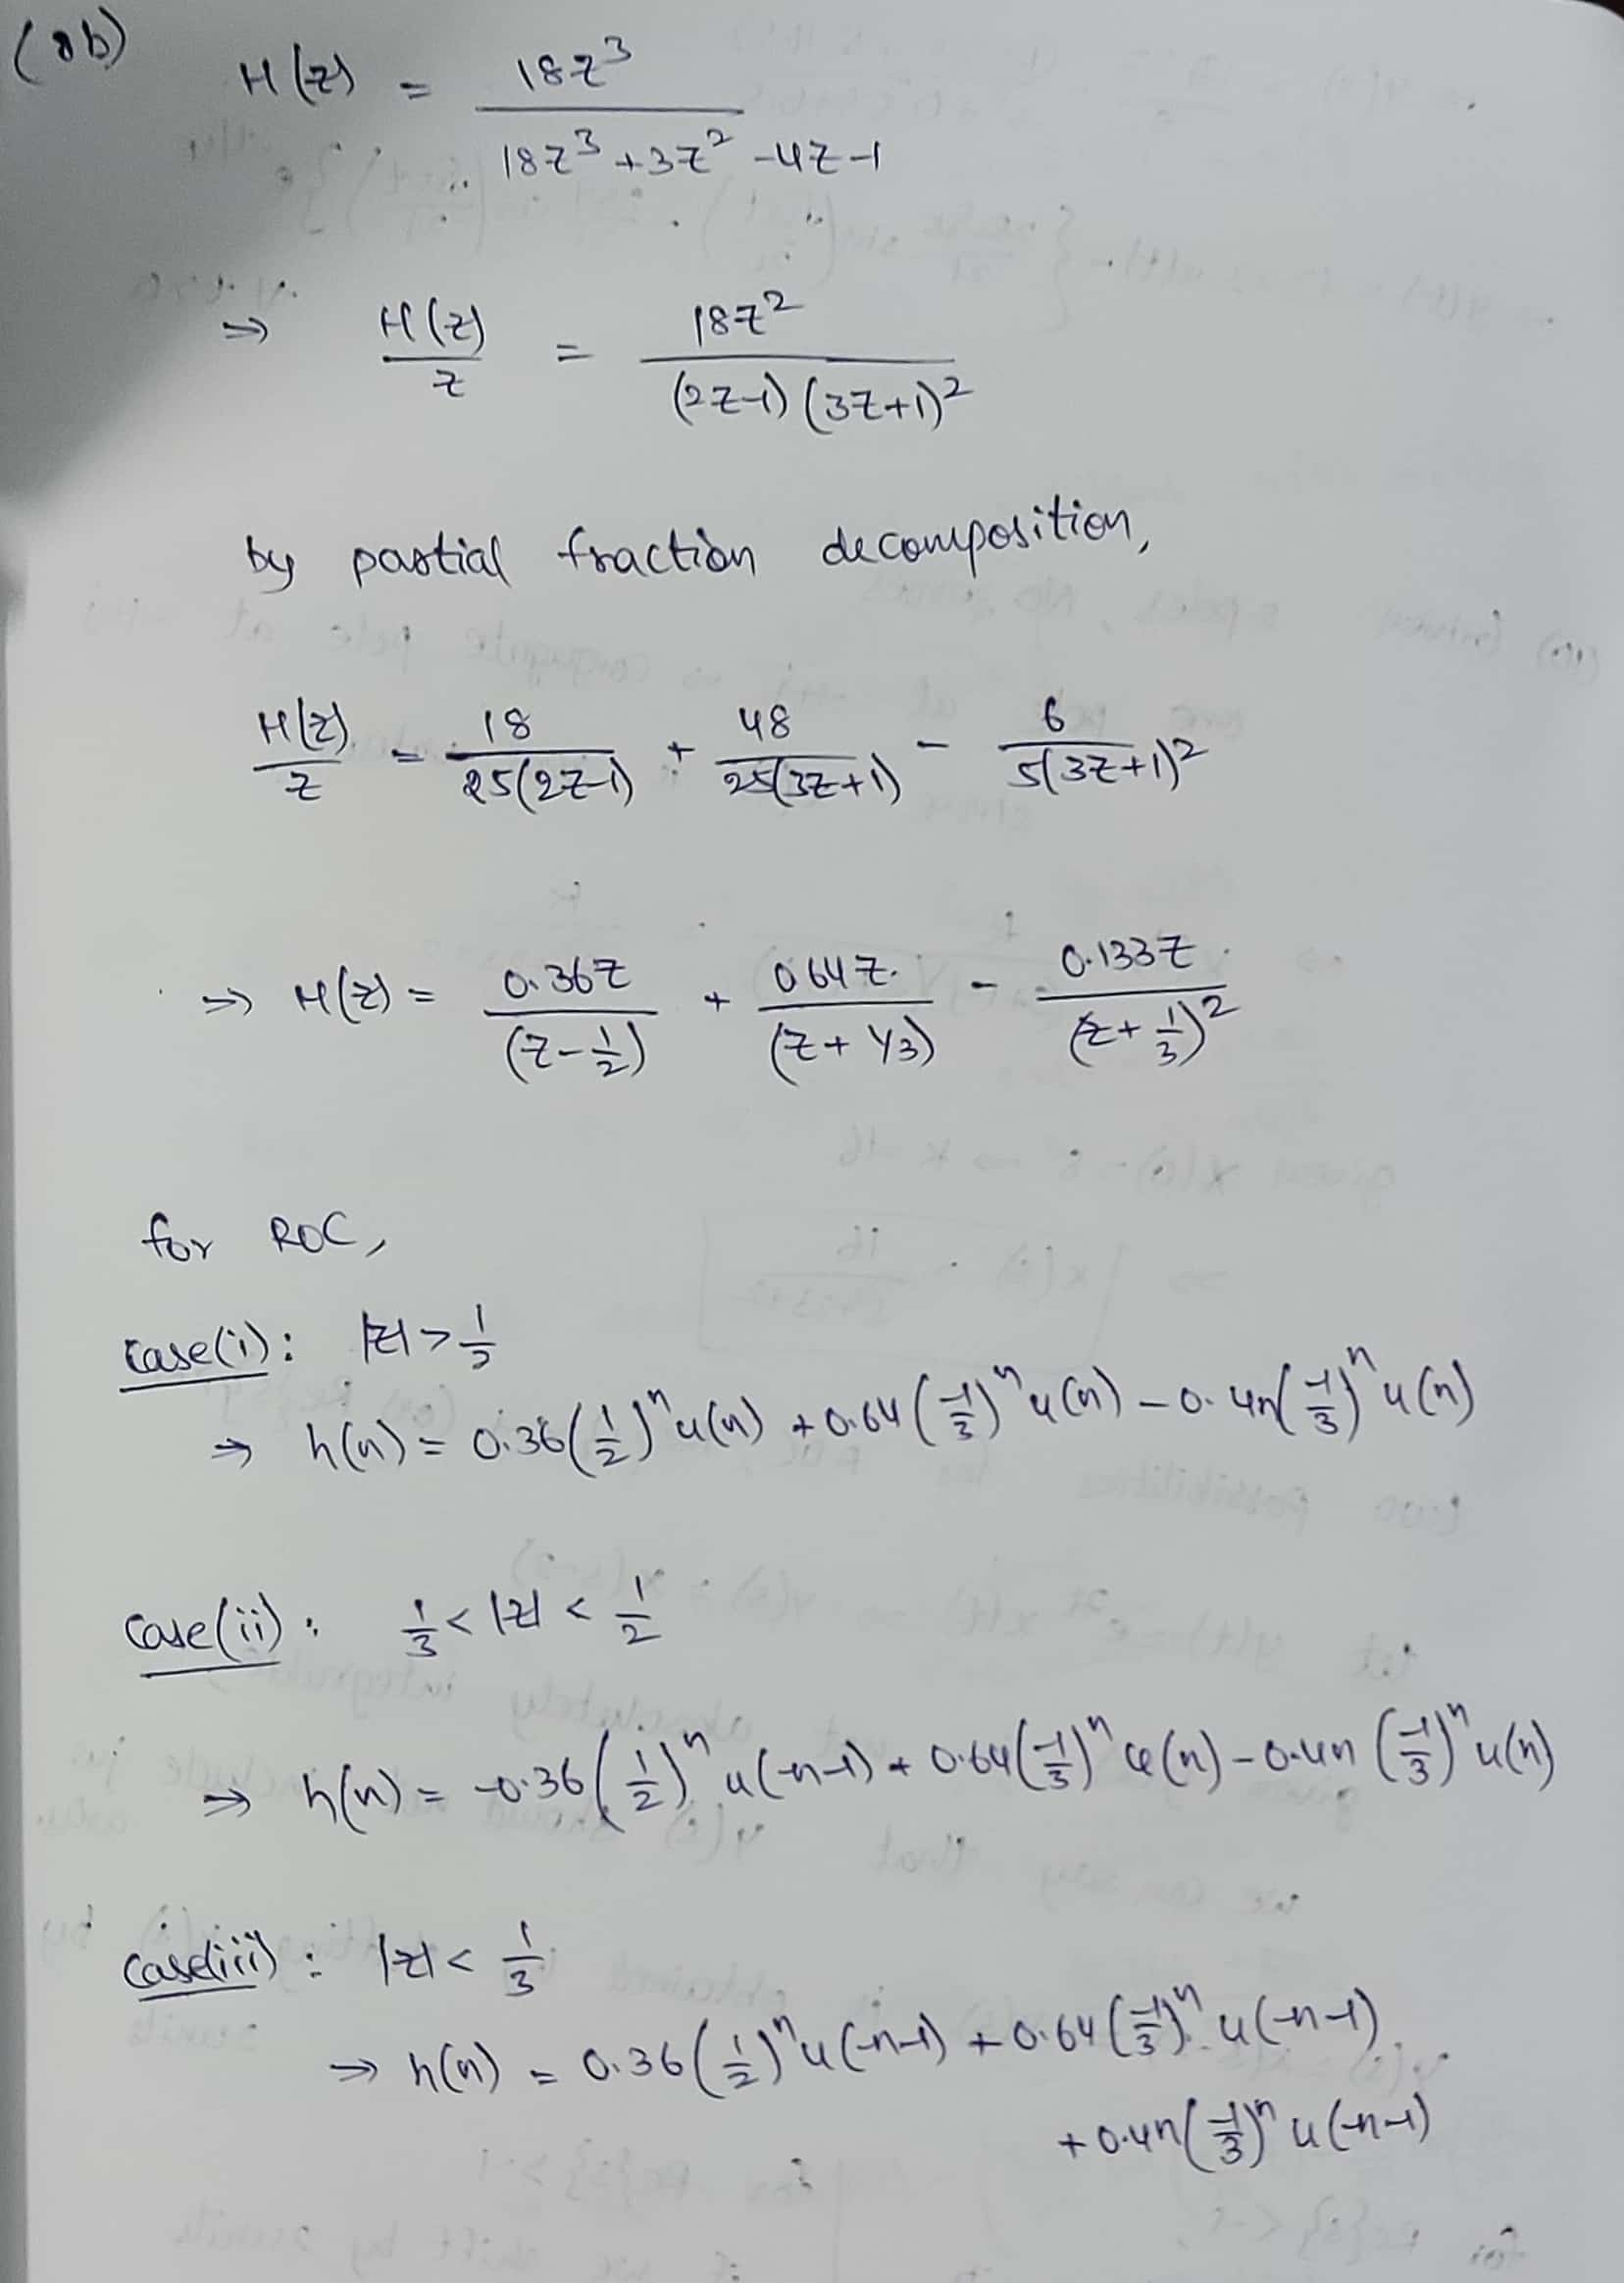

In [96]:
from IPython.display import Image
Image(filename='Q8.jpeg',width=400, height=200)

## QUESTION 9

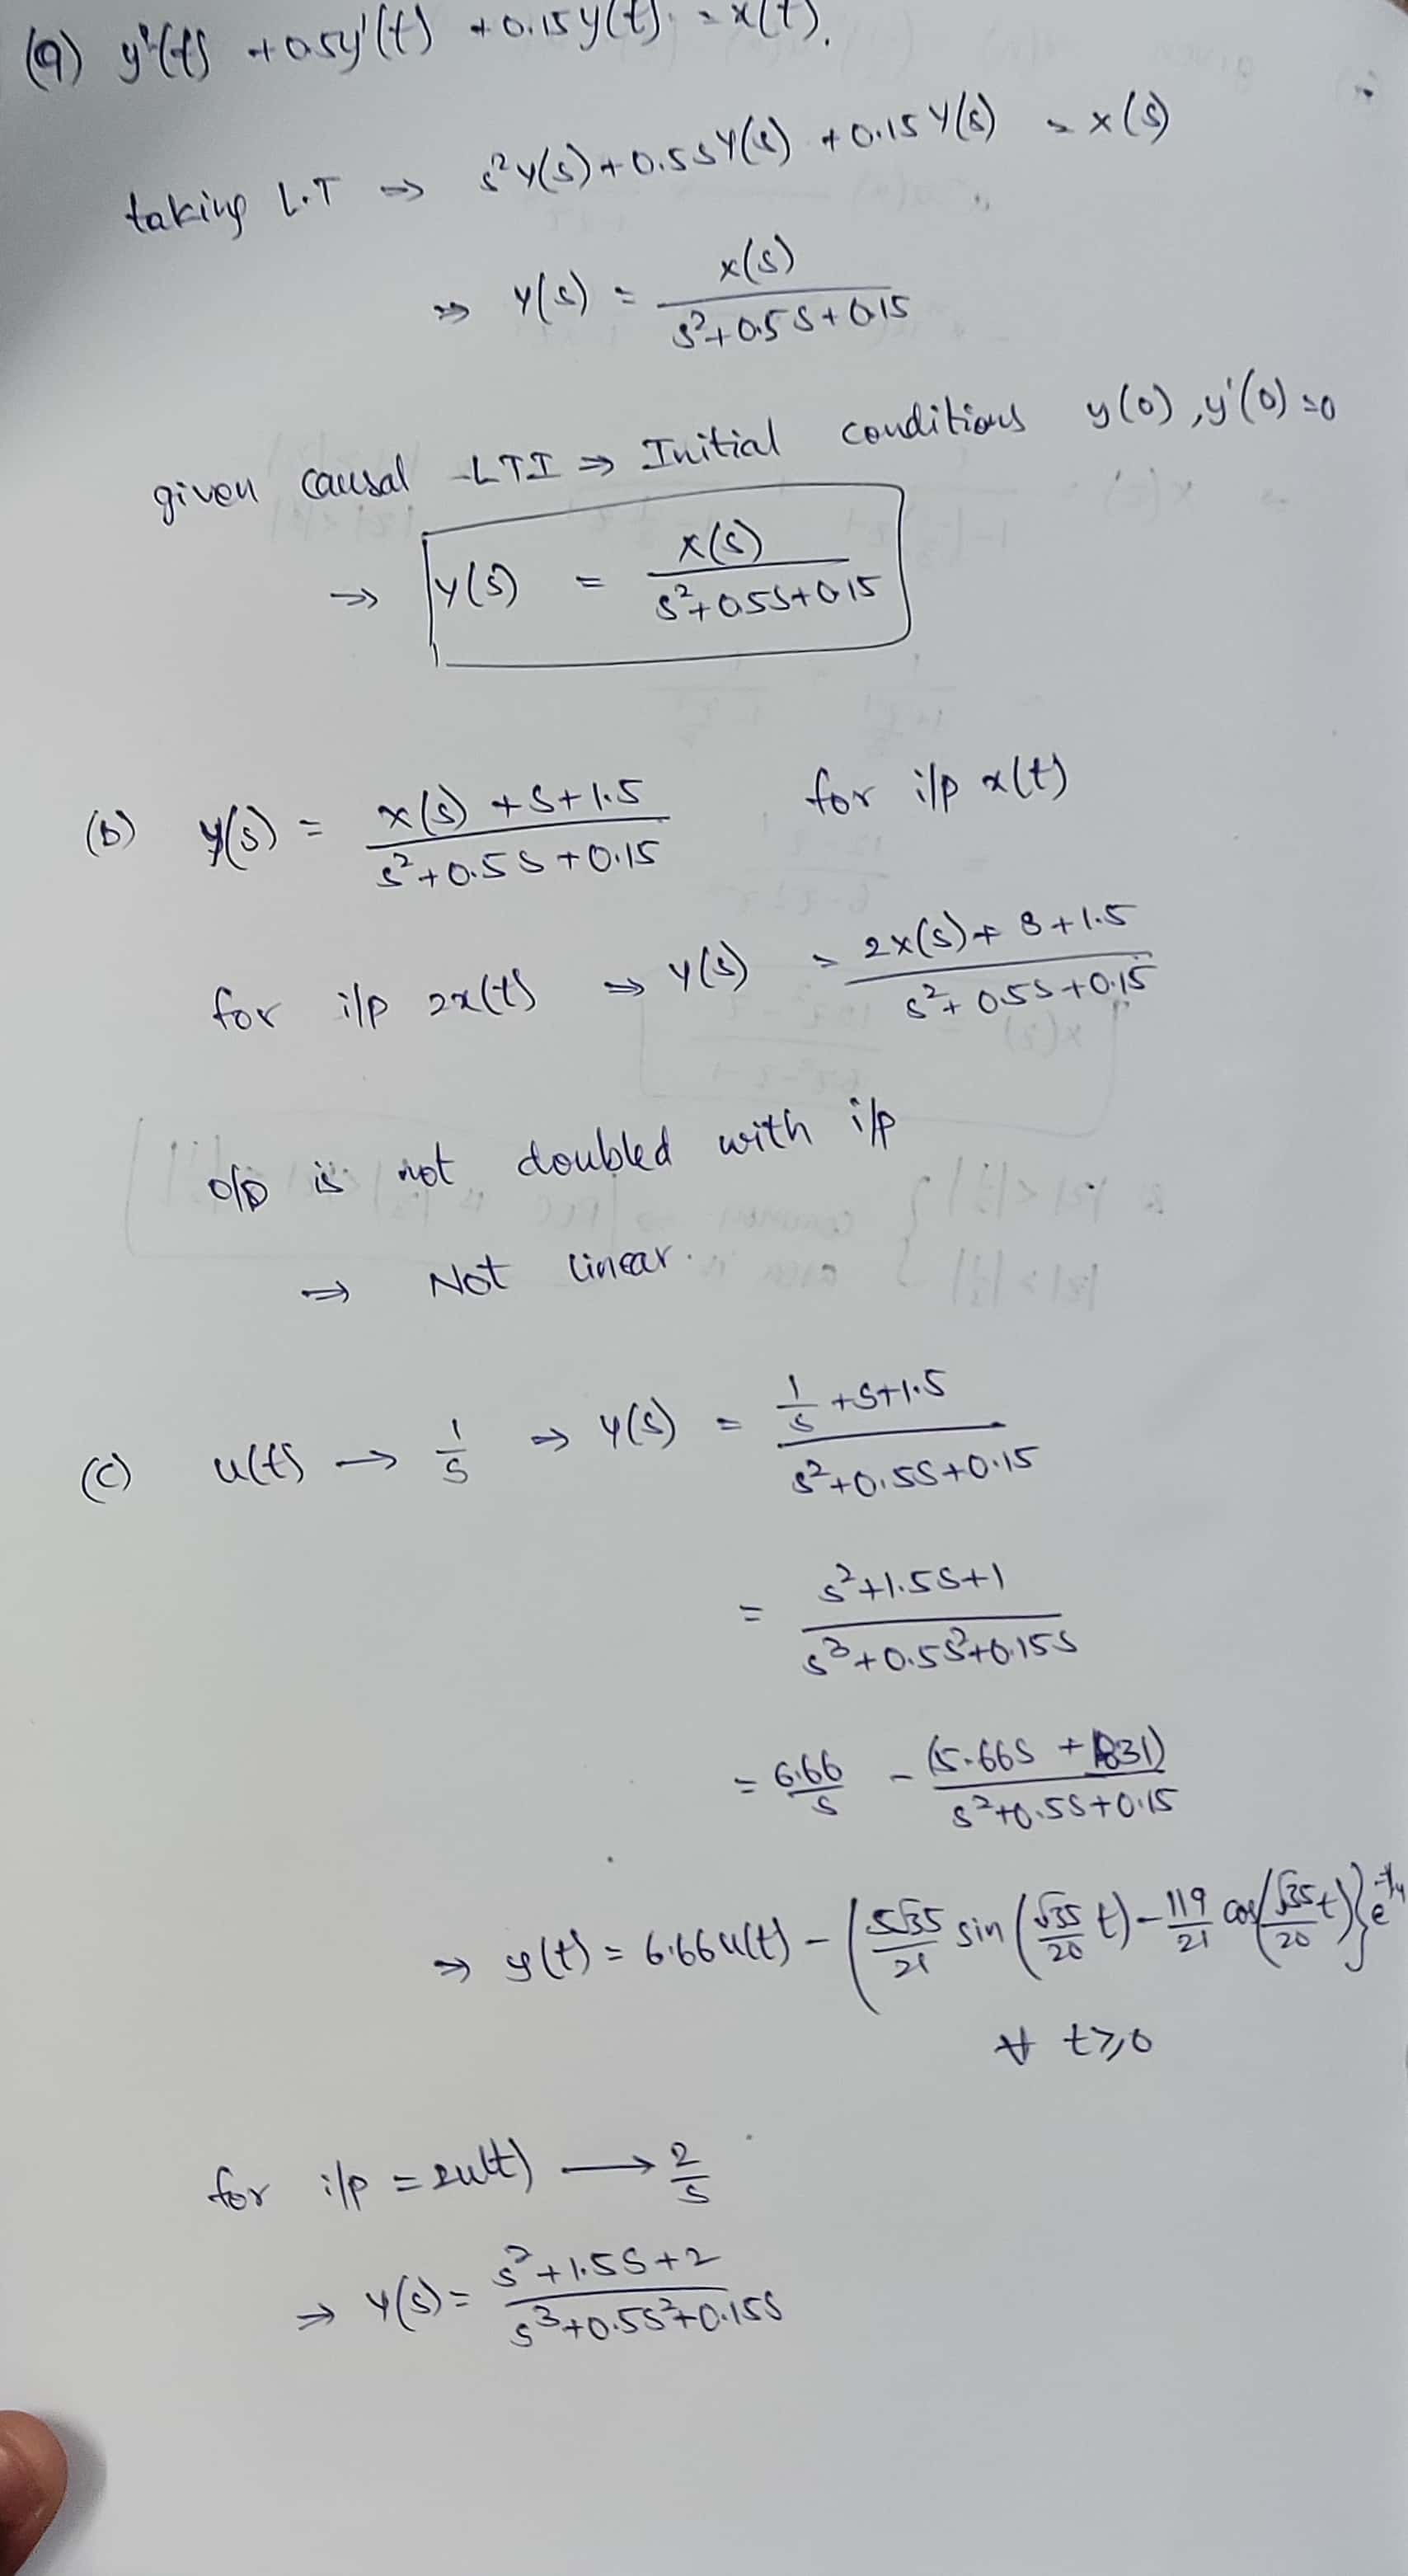

In [97]:
from IPython.display import Image
Image(filename='Q9_1.jpeg',width=400, height=200)

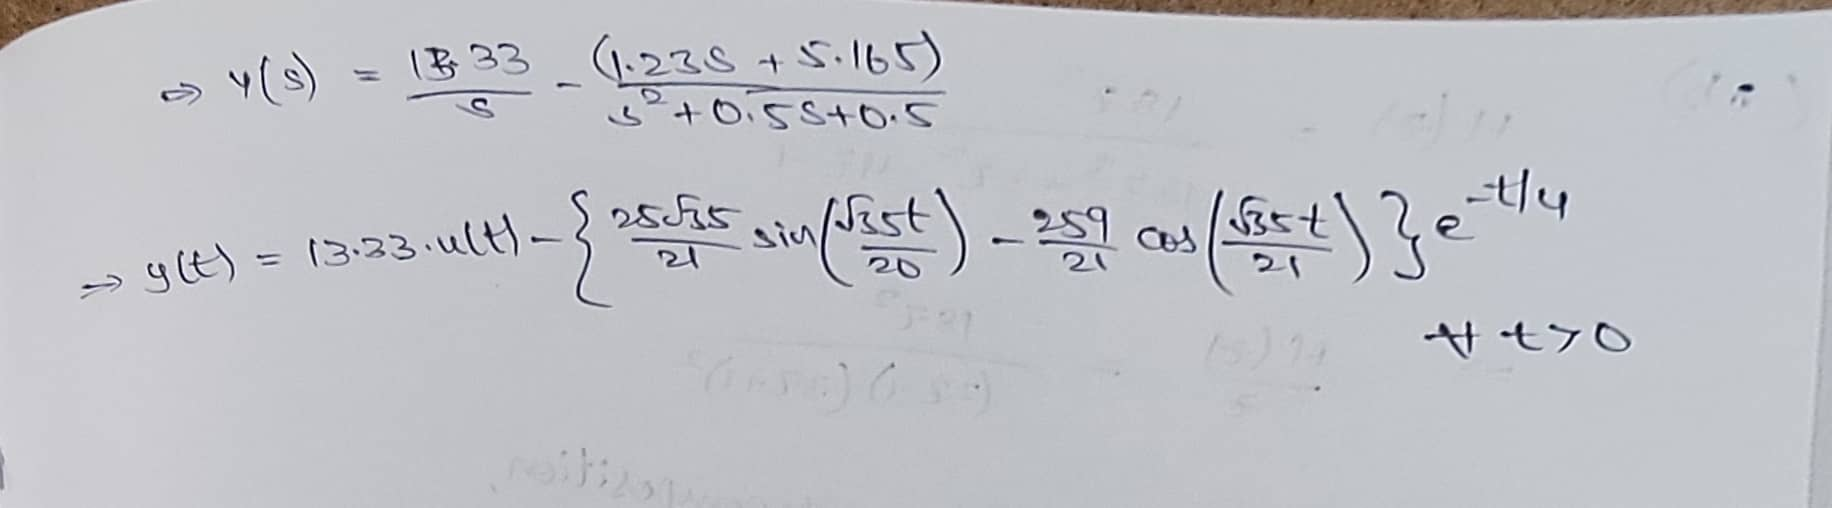

In [98]:
from IPython.display import Image
Image(filename='Q9_2.jpeg',width=400, height=200)

## QUESTION 10

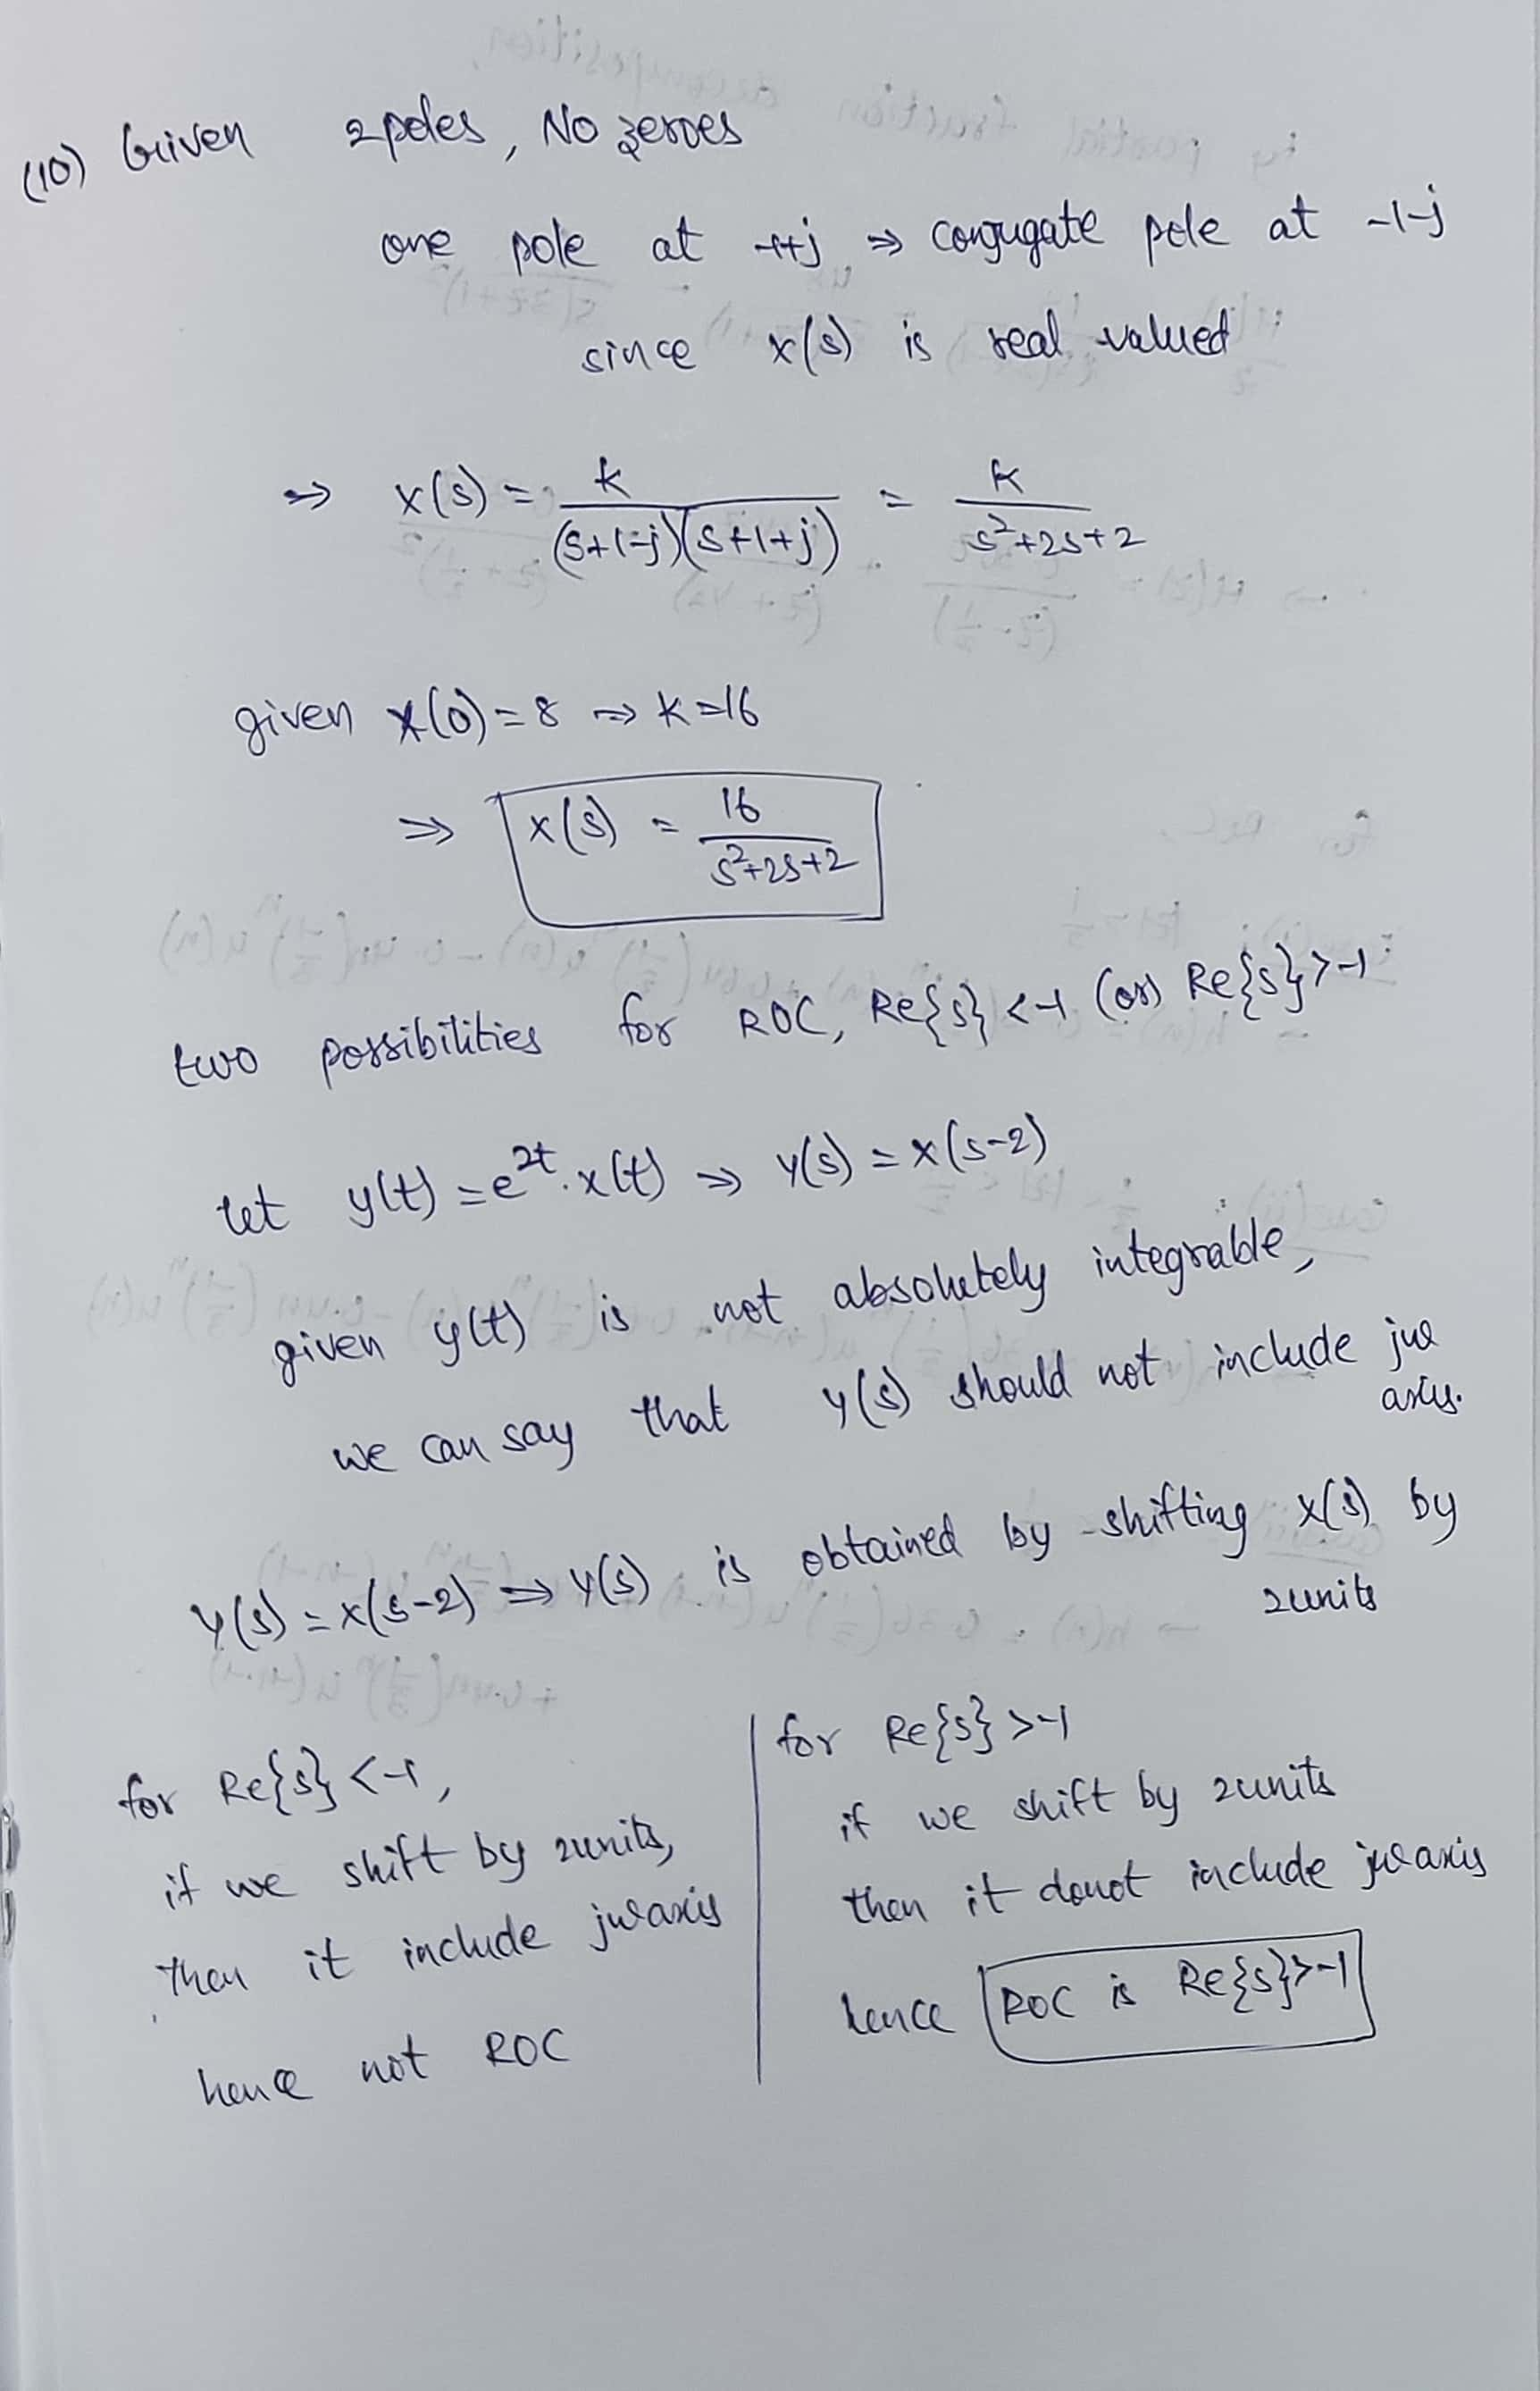

In [99]:
from IPython.display import Image
Image(filename='Q10.jpeg',width=400, height=200)